<a href="https://colab.research.google.com/github/KIHONG-KIM/AIFFEL_quest/blob/main/Project/0603_Data_cleaning/4_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1. 이것만큼은 꼭 해보세요!
- 프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하되, 아래 내용만큼은 반드시 실습해봅시다.

### 결측치 판단 및 처리
1. [힌트] 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.
이상치 판단 및 처리
2. [힌트] 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.

In [81]:
# 모듈 import 및 파일 불러오기
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

df = pd.read_csv('/content/trip.csv')

In [82]:
df.columns

Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')

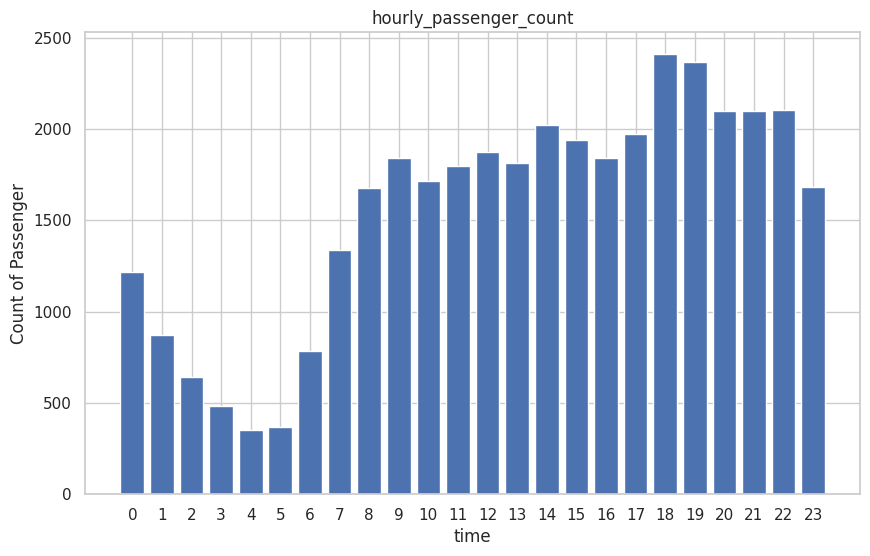

In [83]:
# 시간대 별 탑승객 숫자 확인
df['datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) # datetime으로 데이터 타입 변경
df['hour'] = df['datetime'].dt.hour # 시간 추출

hourly_passenger_count = df.groupby('hour')['passenger_count'].sum().reset_index() # 시간으로 그룹화 및 탑승객 수 합산

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(hourly_passenger_count['hour'], hourly_passenger_count['passenger_count'])
plt.title('hourly_passenger_count')
plt.xlabel('time')
plt.ylabel('Count of Passenger')
plt.xticks(range(24))  # 시간대(0~23)를 모두 표시
plt.show()

In [ ]:
# 결측치 확인
# fare amount에 결측치 3개가 있음을 알 수 있다.
for col in df:
    print(f"{col:>22} : {df[col].isnull().sum()}")

        passenger_name : 0
  tpep_pickup_datetime : 0
 tpep_dropoff_datetime : 0
        payment_method : 0
       passenger_count : 0
         trip_distance : 0
           fare_amount : 3
            tip_amount : 0
          tolls_amount : 0


<Axes: >

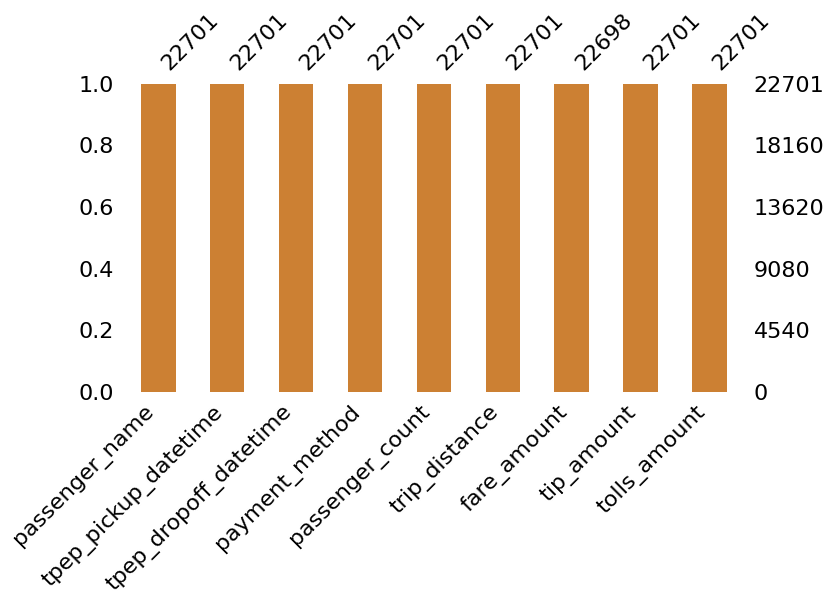

In [ ]:
# missingno lib 사용, 결측치 시각화
msno.bar(df=df.iloc[:, :], figsize=(8, 4), color=(0.8, 0.5, 0.2))

In [ ]:
# 결측치 처리
print(df['fare_amount'].mean())
df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].mean())
df['fare_amount'].isna().any()

13.02400916380298


False

In [ ]:
# 전체적인 값 확인
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,datetime,hour
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514,2017-06-29 07:27:13.591031296,13.726884
min,0.000000,0.000000,-120.000000,0.000000,0.000000,2017-01-01 00:08:25,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000,2017-03-30 03:04:51,9.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000,2017-06-23 12:35:57,14.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000,2017-10-02 10:17:30,19.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000,2017-12-31 23:45:30,23.000000
std,1.304942,3.653023,13.239199,2.800537,1.399153,NaN,6.224517


# 이상치 처리

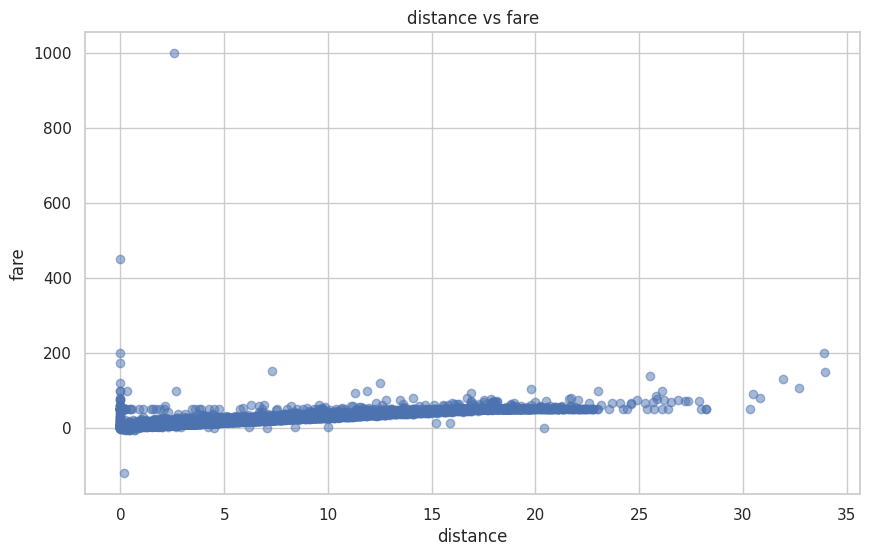

In [ ]:
# 거리 별 탑승 금액 확인
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.5)
plt.title('distance vs fare')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

In [ ]:
# 가격이 높지만, 거리가 짧은 행 삭제
a = df[ ( df['fare_amount'] > 100 ) & (df['trip_distance'] < 1) ]
df.drop( a.index, axis = 0, inplace=True)

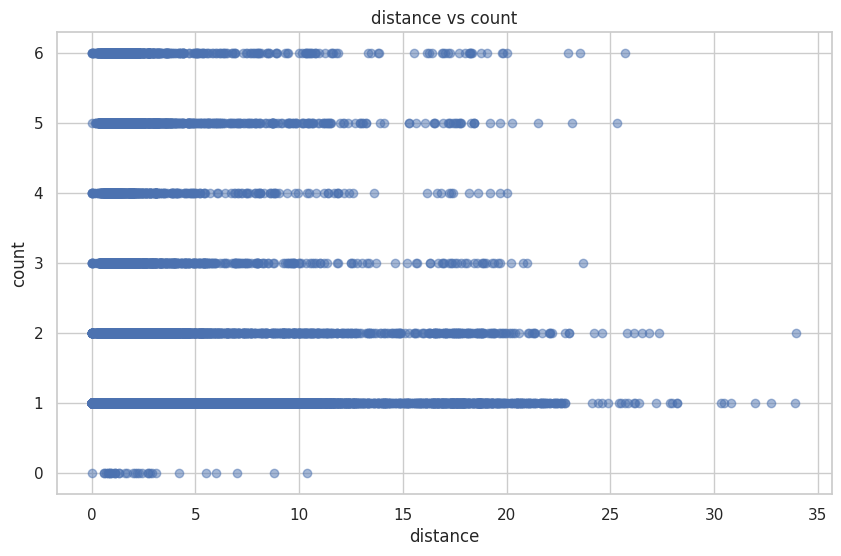

In [ ]:
# 거리 vs 탑승객 수
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['passenger_count'], alpha=0.5)
plt.title('distance vs count')
plt.xlabel('distance')
plt.ylabel('count')
plt.show()

# 탑승자 수가 이상한 부분 삭제 - 36은 이상함.
a = df['passenger_count'][df['passenger_count'] > 25 ]
df.drop(a.index, axis=0, inplace=True)

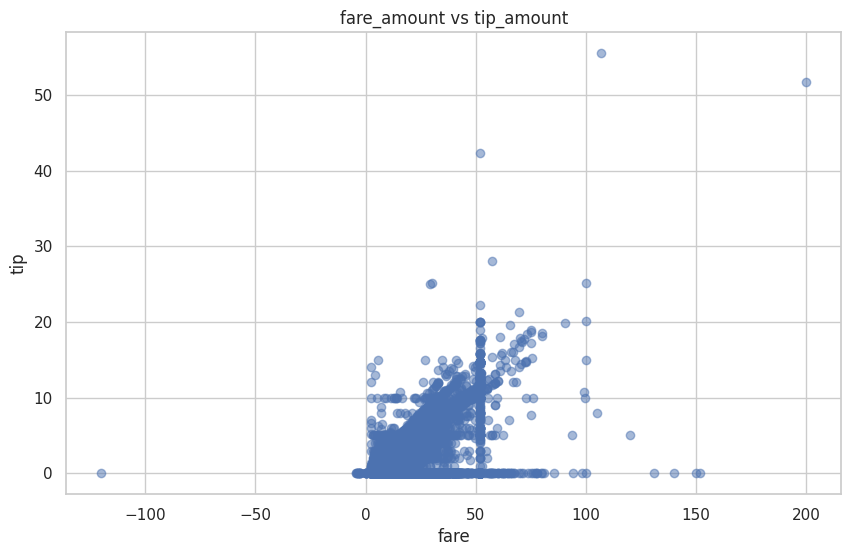

In [ ]:
# 운임과 팁
plt.figure(figsize=(10, 6))
plt.scatter(df['fare_amount'], df['tip_amount'], alpha=0.5)
plt.title('fare_amount vs tip_amount')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()

# 팁이 너무 큰 것 삭제 - 모델 생성 시 혼선 우려
a = df[df['tip_amount'] > 100]
df.drop(a.index, axis = 0, inplace=True)

## Step 2. 이런것도 해볼 수 있어요! 자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
1. [힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?
2. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [ ]:
# 1. [주행시간과 주행거리, 요금의 상관관계 확인]

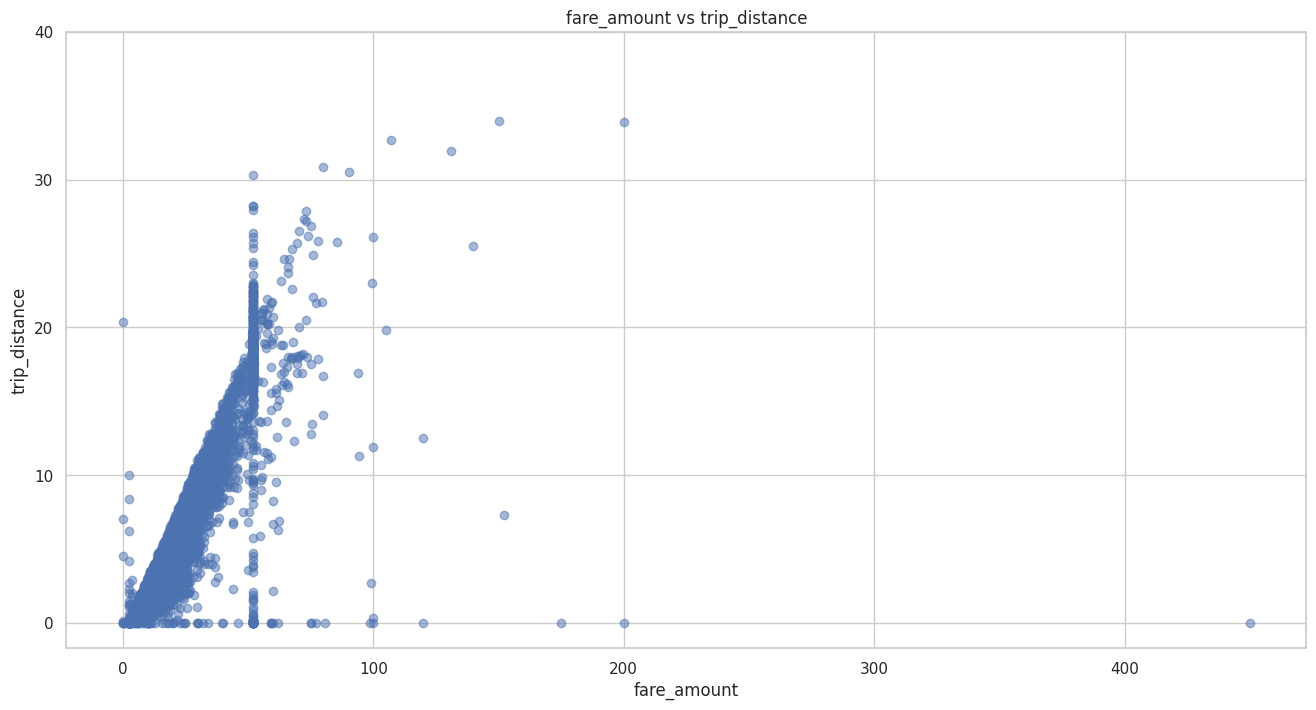

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,datetime,hour,time


In [111]:
# f, ax = plt.subplots(1, 1, figsize=(7, 7))
# df[['trip_distance', 'tip_amount']].groupby(['tip_amount'], as_index=True).mean().sort_values(by='tip_amount', ascending=False).plot.bar(ax=ax)

# 운임과 팁 관계
plt.figure(figsize=(16, 8))
plt.scatter(df['fare_amount'],df['trip_distance'], alpha=0.5)

plt.yticks([x for x in range(0, 50, 10)])

plt.title('fare_amount vs trip_distance')
plt.xlabel('fare_amount')
plt.ylabel('trip_distance')
plt.show()


# a = df[df['trip_distance'] < 0]
# a
a = df[df['fare_amount'] < 0]
a
# df.drop(a.index, axis = 0, inplace=True)

In [99]:
df.columns
drop_off = pd.to_datetime( df['tpep_dropoff_datetime'])
pick_up = pd.to_datetime( df['tpep_pickup_datetime'])
a = drop_off - pick_up
df['time'] = a.dt.total_seconds() // 60
df['time']

0        14.0
1        26.0
2         7.0
3        30.0
4        16.0
         ... 
22696     3.0
22697    40.0
22698     4.0
22699    11.0
22700    13.0
Name: time, Length: 22701, dtype: float64

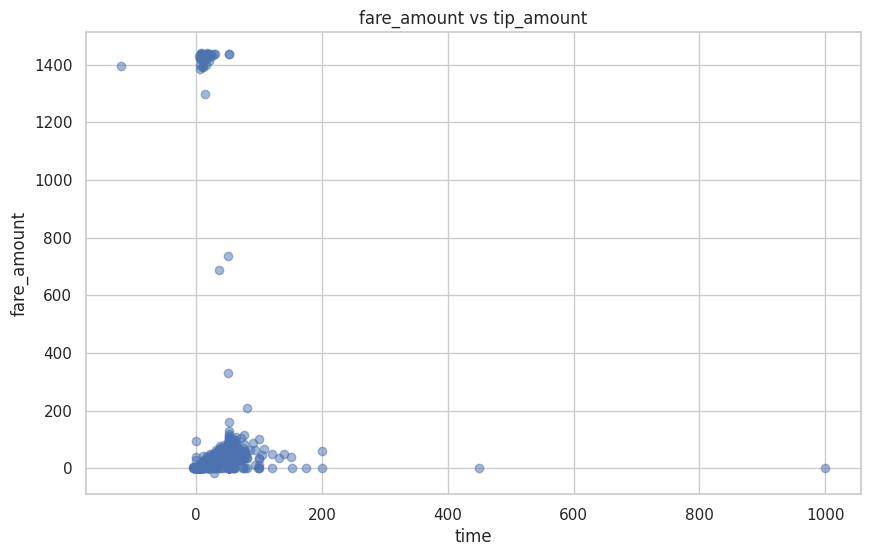

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,datetime,hour,time
9358,Donna Summers,11/05/2017 1:23:08 AM,11/05/2017 1:06:09 AM,Cash,1,5.7,28.0,0.0,0.0,2017-11-05 01:23:08,1,-17.0


In [102]:
# df[['time', 'fare_amount']].groupby(['time'], as_index=True).mean().sort_values(by='time', ascending=False).plot.bar()

# 운임과 팁
plt.figure(figsize=(10, 6))
plt.scatter(df['fare_amount'],df['time'], alpha=0.5)
# plt.xticks([x for x in range(0, 50, 10)])
plt.title('fare_amount vs tip_amount')
plt.xlabel('time')
plt.ylabel('fare_amount')
plt.show()

a = df[df['time'] < 0]
a

In [ ]:
#2.  [새로운 컬럼 만들기] Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

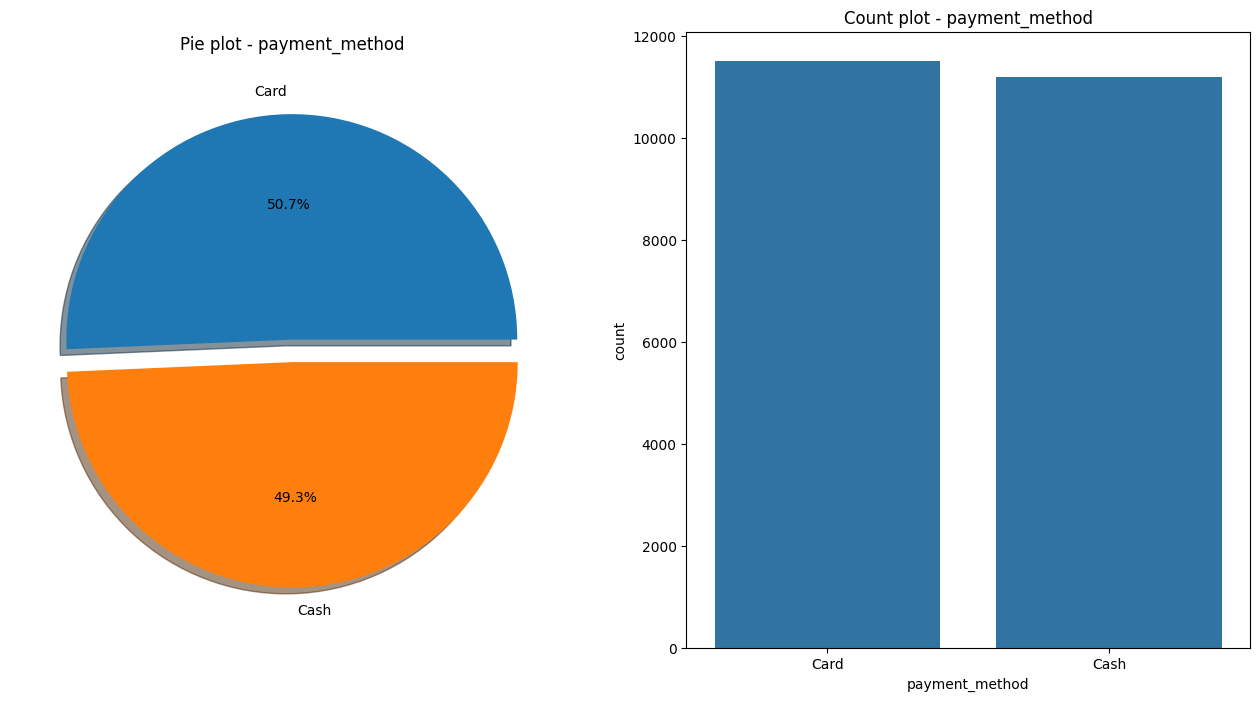

In [ ]:
df['payment_method'] = df['payment_method'].apply( lambda x : "Cash" if x == "Cash" else "Card" )

df['payment_method'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(16, 8))
df['payment_method'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - payment_method')          # X축 이름 넣기
ax[0].set_ylabel('')                            # y축 라벨 없애기

sns.countplot(x='payment_method', data=df, ax=ax[1])
# seaborn style을 사용한 countplot차트에서 x축은 'Survived'라는 열의 데이터를 사용하고, data=df_train 사용, 0,1번 중 1번에 차트를 그리겠다.
ax[1].set_title('Count plot - payment_method')        # X축 이름 넣기

plt.show()

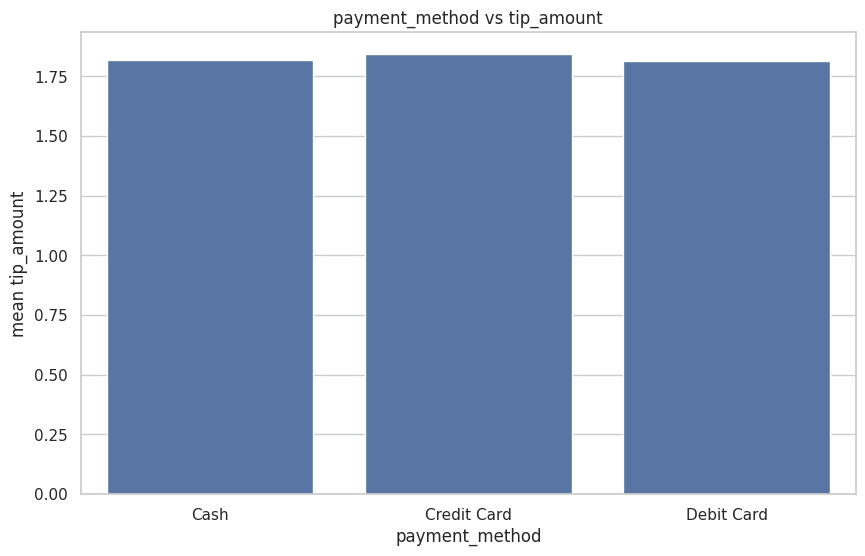

In [56]:
# 지불 방법별 팁 금액 시각화
payment_method_tip = df.groupby('payment_method')['tip_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='tip_amount', data=payment_method_tip)
plt.title('payment_method vs tip_amount')
plt.xlabel('payment_method')
plt.ylabel('mean tip_amount')
plt.show()

In [58]:
df.groupby('payment_method')['tip_amount'].mean()

payment_method
Cash           1.819340
Credit Card    1.844160
Debit Card     1.813051
Name: tip_amount, dtype: float64